**作者**：wxt_zxf

In [18]:
a = 0.5

data = [10.,15.,8.,20.,10.,16.,18.,20.,22.,24.,20.,26.,27.,29.,29.]

#一次平滑曲线
se = []

for i in range(len(data)):
    pre = 0.;
    if not i  == 0:
        pre = a * data[i] + (1-a) * se[i-1]
    else:
        pre = (1-a) * (data[0] + data[1] + data[2]) / 3 + a * data[i]

    se.append(round(pre,2))

print(data)
print(se)

[10.0, 15.0, 8.0, 20.0, 10.0, 16.0, 18.0, 20.0, 22.0, 24.0, 20.0, 26.0, 27.0, 29.0, 29.0]
[10.5, 12.75, 10.38, 15.19, 12.59, 14.29, 16.14, 18.07, 20.04, 22.02, 21.01, 23.51, 25.26, 27.13, 28.06]


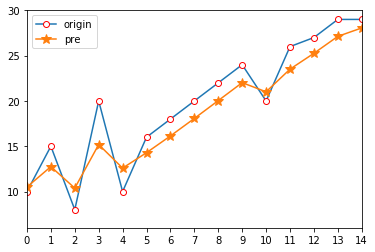

In [19]:
import matplotlib.pyplot as plt

x = range(len(data))
plt.ylim(6, 30)  # 限定纵轴的范围
plt.plot(x, data, marker='o', mec='r', mfc='w',label='origin')
plt.plot(x, se, marker='*', ms=10,label='pre')
plt.legend()  # 让图例生效
plt.xticks(x, range(len(data)), rotation=0)
plt.margins(0)
plt.show()


In [20]:
a0 = 0.2
a1 = 0.5
a2 = 0.7
a3 = 0.9

data = [10.,15.,8.,20.,10.,16.,18.,20.,22.,24.,20.,26.,27.,29.,29.]

se0 = []
se1 = []
se2 = []
se3 = []
 

for i in range(len(data)):
    pre0 = 0.
    pre1 = 0.
    pre2 = 0.
    pre3 = 0.

    if not i == 0:
        pre0 = a0 * data[i] + (1 - a0) * se0[i - 1]
        pre1 = a1 * data[i] + (1 - a1) * se1[i - 1]
        pre2 = a2 * data[i] + (1 - a2) * se2[i - 1]
        pre3 = a3 * data[i] + (1 - a3) * se3[i - 1]
    else:
        pre0 = (1-a) * (data[0] + data[1] + data[2]) / 3 + a * data[i]
        pre1 = (1-a) * (data[0] + data[1] + data[2]) / 3 + a * data[i]
        pre2 = (1-a) * (data[0] + data[1] + data[2]) / 3 + a * data[i]
        pre3 = (1-a) * (data[0] + data[1] + data[2]) / 3 + a * data[i]

    se0.append(round(pre0, 2))
    se1.append(round(pre1, 2))
    se2.append(round(pre2, 2))
    se3.append(round(pre3, 2))

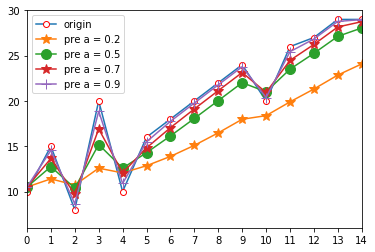

In [21]:
import matplotlib.pyplot as plt


x = range(len(data)) 
plt.ylim(6, 30)  # 限定纵轴的范围
plt.plot(x, data, marker='o', mec='r', mfc='w',label='origin')
plt.plot(x, se0, marker='*', ms=10,label='pre a = 0.2')
plt.plot(x, se1, marker='o', ms=10,label='pre a = 0.5')
plt.plot(x, se2, marker='*', ms=10,label='pre a = 0.7')
plt.plot(x, se3, marker='+', ms=10,label='pre a = 0.9')
plt.legend()  # 让图例生效
plt.xticks(x, range(len(data)), rotation=0)
plt.margins(0)
plt.show()


In [22]:
def func(data, a):
    se = []
    for i in range(len(data)):
        pre = 0.;
        if not i  == 0:
            pre = a * data[i] + (1-a) * se[i-1]
        else: 
            pre = (1-a) * (data[0] + data[1] + data[2]) / 3 + a * data[i] 
            
        se.append(round(pre,2))
    
    return se

In [23]:
print (data)

[10.0, 15.0, 8.0, 20.0, 10.0, 16.0, 18.0, 20.0, 22.0, 24.0, 20.0, 26.0, 27.0, 29.0, 29.0]


二次平滑实验

In [24]:
an = 0.5
#data1 = [676,825,774,716,940,1159,1384,1524,1688,1688,1958,2031,2234,2566,2820,3006,3093,3277,3514,3770]
print(len(data))
s1 = func(data,an)
print(s1) 

15
[10.5, 12.75, 10.38, 15.19, 12.59, 14.29, 16.14, 18.07, 20.04, 22.02, 21.01, 23.51, 25.26, 27.13, 28.06]


计算s1<sup>(2)</sup>

In [25]:
s12 = func(s1,an)
print(data)
print(s1)
print(s12) 

[10.0, 15.0, 8.0, 20.0, 10.0, 16.0, 18.0, 20.0, 22.0, 24.0, 20.0, 26.0, 27.0, 29.0, 29.0]
[10.5, 12.75, 10.38, 15.19, 12.59, 14.29, 16.14, 18.07, 20.04, 22.02, 21.01, 23.51, 25.26, 27.13, 28.06]
[10.86, 11.8, 11.09, 13.14, 12.87, 13.58, 14.86, 16.46, 18.25, 20.13, 20.57, 22.04, 23.65, 25.39, 26.73]


计算预测曲线，参数: Y<sub>t+T</sub> = a<sub>t</sub> + b<sub>t</sub>T<br>
a<sub>t</sub> = 2\*s1<sub>t</sub>-s12<sub>t</sub><br>
b<sub>t</sub> = a/(1-a)  \* (s1<sub>t</sub>-s12<sub>t</sub>)

In [26]:
def param(s1,s12,a):
    num = len(s1) - 1
    at = 2 * s1[num] - s12[num]
    bt = a / (1 - a) * (s1[num] - s12[num])
    
    return at,bt
    

In [27]:
at,bt = param(s1,s12,a)
Y_next = at + bt * 1
Y_next_next = at + bt * 2
print(round(Y_next,2))
print(round(Y_next_next,2))

30.72
32.05


In [28]:
s123 = func(s12,an)
print(data)
print(s1)
print(s12) 
print(s123) 

[10.0, 15.0, 8.0, 20.0, 10.0, 16.0, 18.0, 20.0, 22.0, 24.0, 20.0, 26.0, 27.0, 29.0, 29.0]
[10.5, 12.75, 10.38, 15.19, 12.59, 14.29, 16.14, 18.07, 20.04, 22.02, 21.01, 23.51, 25.26, 27.13, 28.06]
[10.86, 11.8, 11.09, 13.14, 12.87, 13.58, 14.86, 16.46, 18.25, 20.13, 20.57, 22.04, 23.65, 25.39, 26.73]
[11.05, 11.43, 11.26, 12.2, 12.54, 13.06, 13.96, 15.21, 16.73, 18.43, 19.5, 20.77, 22.21, 23.8, 25.27]


In [29]:
def param3(s1,s12,s123,a):
    num = len(s1) - 1
    at = 3 * s1[num] - 3 * s12[num] +  s123[num]
    bt = a / (2 * (1 - a) * (1 - a)) * ((6 - 5 * a) * s1[num] - (2 * (5 - 4 * a)) * s12[num] + (4 - 3 * a) * s123[num])
    ct = a * a / (2 * (1 - a) * (1 - a)) * (s1[num] - 2 * s12[num] + s123[num]) 
    
    return at,bt,ct

In [30]:
at,bt,ct = param3(s1,s12,s123,an)
Y_next = at + bt * 1 + ct * 1 * 1
Y_next_next = at + bt * 1 + ct * 2 * 2
print(round(Y_next,2))
print(round(Y_next_next,2))

30.2
30.0
